In [1]:
import numpy as np
import pandas as pd
import graphviz
import altair as alt

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import normalize, scale, Normalizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Explanation of Variables

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    - Value 1: typical angina 
    - Value 2: atypical angina 
    - Value 3: non-anginal pain 
    - Value 4: asymptomatic 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. chol - serum cholestoral in mg/dl 
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg - resting electrocardiographic results 
    - Value 0: normal 
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment 
    - Value 1: upsloping 
    - Value 2: flat 
    - Value 3: downsloping 
12. ca - number of major vessels (0-3) colored by flourosopy 
13. thal 
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect 
14. target - have disease or not (1=yes, 0=no)

[Link to original UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)


In [4]:
heart.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Determine if there ANY entry with missing value
heart.isnull().values.any()

False

In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [10]:
heart.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [11]:
X = heart.drop(columns = ['target'])
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [12]:
y = heart['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [13]:
print(len(heart[heart['target']==1]))
print(len(heart[heart['target']==0]))

165
138


## Frequency Plots

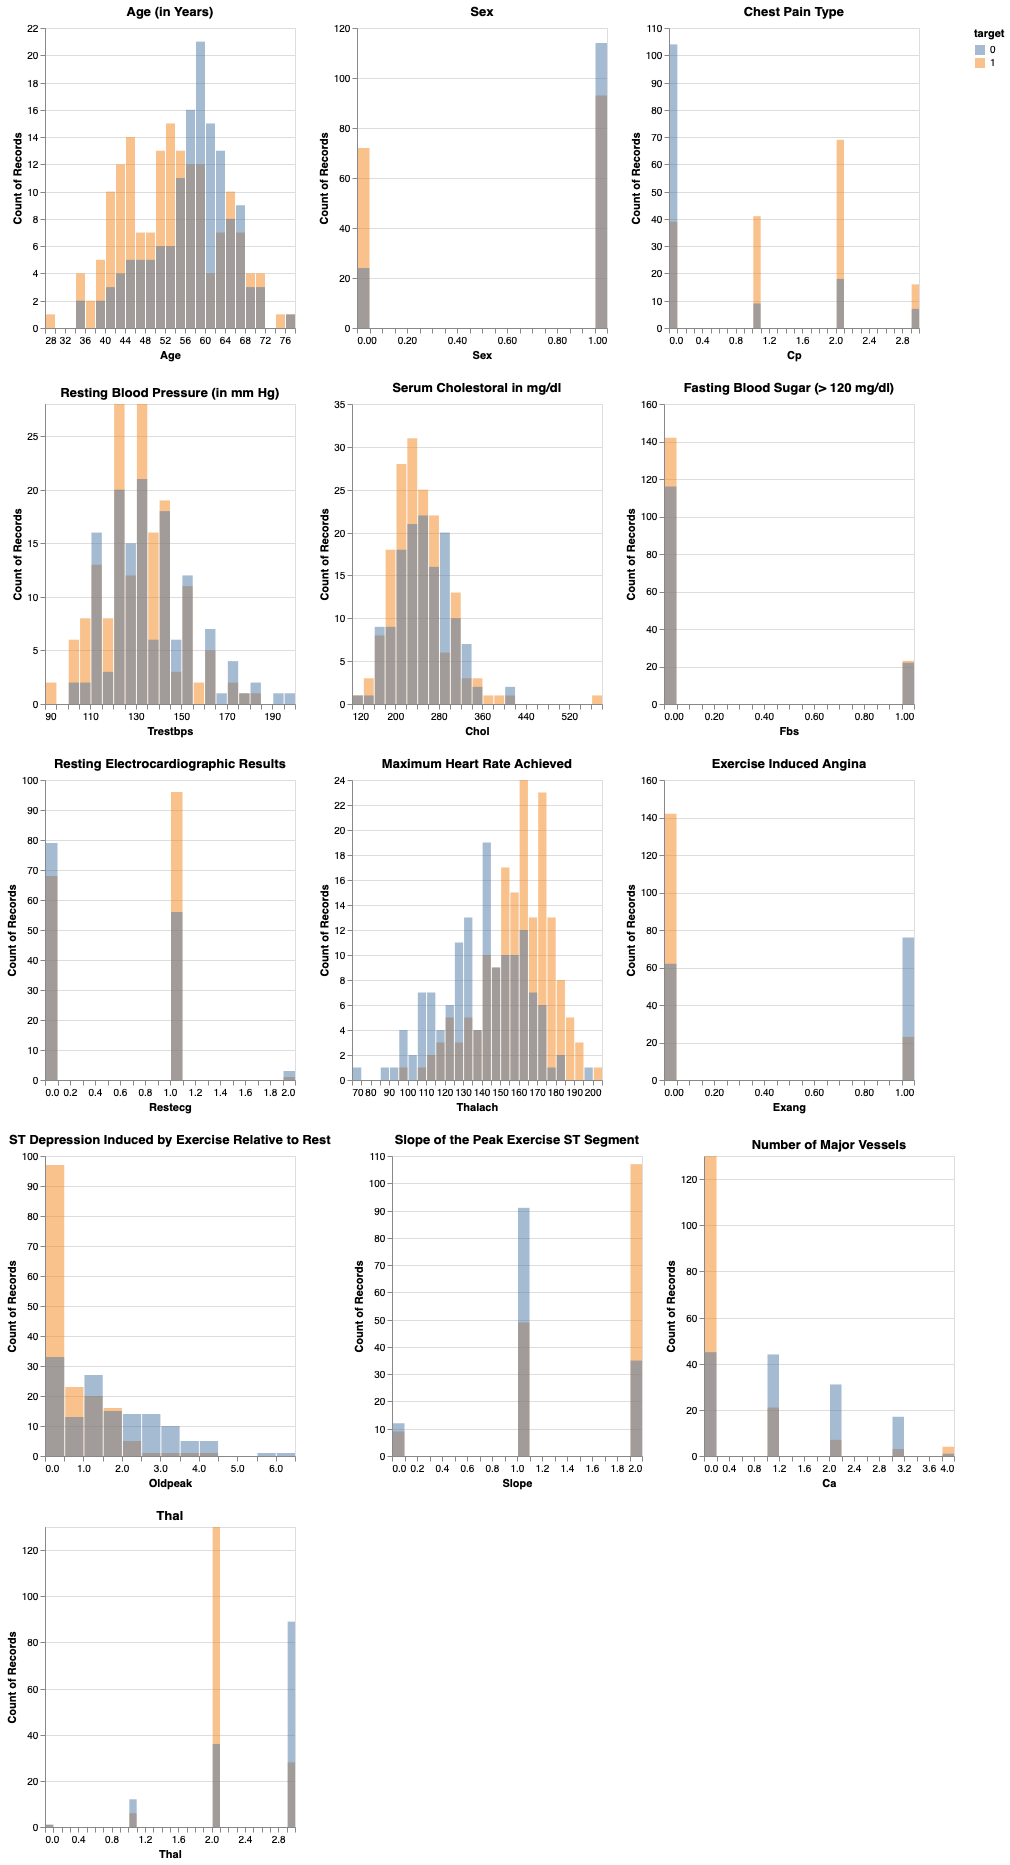

In [114]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

titles = ['Age (in Years)', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure (in mm Hg)', 'Serum Cholestoral in mg/dl',
'Fasting Blood Sugar (> 120 mg/dl)', 'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved', 'Exercise Induced Angina',
'ST Depression Induced by Exercise Relative to Rest', 'Slope of the Peak Exercise ST Segment', 'Number of Major Vessels', 'Thal']

plots = []
    
for feature in features:
    plot = alt.Chart(heart).mark_bar(
        opacity=0.5).encode(
        alt.X(feature, bin=alt.Bin(maxbins=30), title = str.title(feature)),
        alt.Y('count()', stack=None),
        alt.Color('target:N')).properties(
        title= (titles.pop(0)),
        width = 250)
    plots.append(plot)

def make_hcc(row_of_charts):
    hconcat = [chart for chart in row_of_charts]
    hcc = alt.HConcatChart(hconcat=hconcat)
    return hcc

def facet_plot(charts, charts_per_row):
    rows_of_charts = [
        charts[i:i+charts_per_row] 
        for i in range(0, len(charts), charts_per_row)]        
    vconcat = [make_hcc(r) for r in rows_of_charts]    
    vcc = alt.VConcatChart(vconcat=vconcat)
      
    return vcc

faceted_charts = facet_plot(plots, 3)    
faceted_charts

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [20]:
# Identify the categorical and numeric columns
numeric_features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca']
categorical_features = ['cp', 'slope', 'thal', 'restecg']

In [35]:
for feature in categorical_features:
    print('Feature: %s' %(feature))
    print('------------')
    print(heart[feature].value_counts())
    print('\n\n')

Feature: cp
------------
0    143
2     87
1     50
3     23
Name: cp, dtype: int64



Feature: slope
------------
2    142
1    140
0     21
Name: slope, dtype: int64



Feature: thal
------------
2    166
3    117
1     18
0      2
Name: thal, dtype: int64



Feature: restecg
------------
1    152
0    147
2      4
Name: restecg, dtype: int64





In [21]:
# Create the transformer for numeric and categorical variables
preprocessor = ColumnTransformer(transformers=[
    ('minmax', MinMaxScaler(), numeric_features),
    ('ohe', OneHotEncoder(), categorical_features)])

In [22]:
# Apply data transformations and convert back to dataframe
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
                       index=X_train.index,
                       columns=(numeric_features +
                                list(preprocessor.named_transformers_['ohe']
                                     .get_feature_names(categorical_features))))

X_test = pd.DataFrame(preprocessor.transform(X_test),
                      index=X_test.index,
                      columns=X_train.columns)

In [23]:
(numeric_features +
    list(preprocessor.named_transformers_['ohe']
    .get_feature_names(categorical_features)))

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'ca',
 'cp_0.0',
 'cp_1.0',
 'cp_2.0',
 'cp_3.0',
 'slope_0.0',
 'slope_1.0',
 'slope_2.0',
 'thal_0.0',
 'thal_1.0',
 'thal_2.0',
 'thal_3.0',
 'restecg_0.0',
 'restecg_1.0',
 'restecg_2.0']

In [24]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0.0,...,slope_0.0,slope_1.0,slope_2.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,restecg_0.0,restecg_1.0,restecg_2.0
184,0.437500,1.0,0.571429,0.402062,0.0,0.435115,0.0,0.419355,0.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19,0.833333,0.0,0.469388,0.388316,0.0,0.610687,0.0,0.290323,0.50,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
118,0.354167,0.0,0.112245,0.268041,0.0,0.770992,0.0,0.000000,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41,0.395833,1.0,0.367347,0.408935,0.0,0.832061,0.0,0.032258,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
59,0.583333,0.0,0.346939,0.608247,0.0,0.671756,0.0,0.000000,0.25,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Finding Optimal Hyperparameters for Tree-based Models using GridSearchCV

In [32]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [33]:
tree_based_models = {
    'DT': GridSearchCV(DecisionTreeClassifier(random_state = 0),
                       param_grid = {'max_depth': [5, 10, 15, 20, None]},
                       cv = 5),
    'RF': GridSearchCV(RandomForestClassifier(n_estimators = 100, random_state = 0),
                       param_grid = {'max_depth': [5, 10, 15, 20, None]},
                       cv = 5)}

# Prediction loop
for name, model in tree_based_models.items():
    tree = make_pipeline(StandardScaler(),
                         model)
    tree.fit(X_train, y_train)
    print(f"{name} best hyperparams = {model.best_params_}")

DT best hyperparams = {'max_depth': 5}
RF best hyperparams = {'max_depth': 10}


In [26]:
# Create a simple voting classifier using scikit-learn's VotingClassifier

classifiers = {
    "Decision tree"         : DecisionTreeClassifier(max_depth=5, random_state = 0),
    "KNN"                   : KNeighborsClassifier(),
    "Naive Bayes"           : GaussianNB(),
    "Logistic Regression"   : LogisticRegression(solver='lbfgs', random_state = 0),
    "Random Forest"         : RandomForestClassifier(max_depth=10, n_estimators = 100, random_state = 0),
    "SVM"                   : SVC(probability=True, gamma = 'scale')
}


ensemble = VotingClassifier(classifiers.items(), voting="soft")

ensemble.fit(X_train, y_train);
print(f' Ensemble train Accuracy: {ensemble.score(X_train, y_train):.3f}')
print(f' Ensemble test Accuracy: {ensemble.score(X_test, y_test):.3f}')

 Ensemble train Accuracy: 0.913
 Ensemble test Accuracy: 0.902


In [27]:
accuracies = []
for model_name, estimator in ensemble.named_estimators_.items():
    train_accuracy = (estimator.score(X_train, y_train))
    test_accuracy = (estimator.score(X_test, y_test))
    print('%s: Train_error: %0.3f; Test error: %0.3f'%(model_name, train_accuracy, test_accuracy))
    
    accuracies.append([model_name, estimator.score(X_train, y_train), estimator.score(X_test, y_test)])

Decision tree: Train_error: 0.938; Test error: 0.754
KNN: Train_error: 0.860; Test error: 0.885
Naive Bayes: Train_error: 0.640; Test error: 0.754
Logistic Regression: Train_error: 0.839; Test error: 0.869
Random Forest: Train_error: 1.000; Test error: 0.869
SVM: Train_error: 0.880; Test error: 0.902


In [28]:
accuracies_df = pd.DataFrame(data = accuracies, columns = ['model', 'train_accuracy', 'test_accuracy'])
accuracies_df['train_accuracy'] = round((accuracies_df['train_accuracy'] * 100),2)
accuracies_df['test_accuracy'] = round((accuracies_df['test_accuracy'] * 100),2)
accuracies_df['variance'] = abs(accuracies_df['train_accuracy'] - accuracies_df['test_accuracy'])
accuracies_df

,model,train_accuracy,test_accuracy,variance
0,Decision tree,93.80,75.41,18.39
1,KNN,85.95,88.52,2.57
2,Naive Bayes,64.05,75.41,11.36
3,Logistic Regression,83.88,86.89,3.01
4,Random Forest,100.00,86.89,13.11
5,SVM,88.02,90.16,2.14


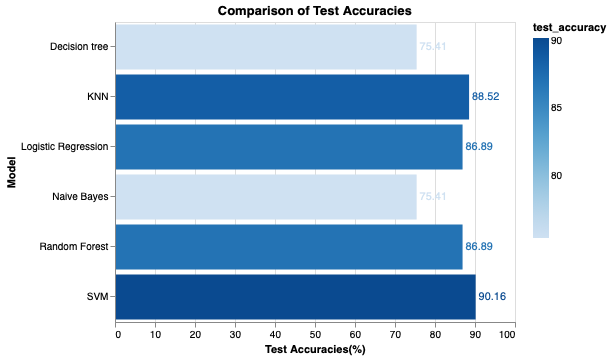

In [29]:
bars = alt.Chart(accuracies_df).mark_bar().encode(
    alt.Y('model:N', title='Model'),
    alt.X('test_accuracy:Q', title='Test Accuracies(%)'),
    alt.Color('test_accuracy:Q')
).properties(height = 300, title = 'Comparison of Test Accuracies')

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3 
).encode(
    text='test_accuracy:Q'
)

(bars + text).properties(height=900)

## Confusion Matrix

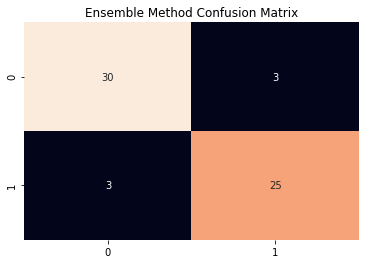

In [30]:
#For ensemble method
ensemble_predict = ensemble.predict(X_test)
ensemble_cm = confusion_matrix(y_test, ensemble_predict)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Ensemble Method Confusion Matrix")
ensemble_plot = sns.heatmap(ensemble_cm, annot=True, cbar = False)

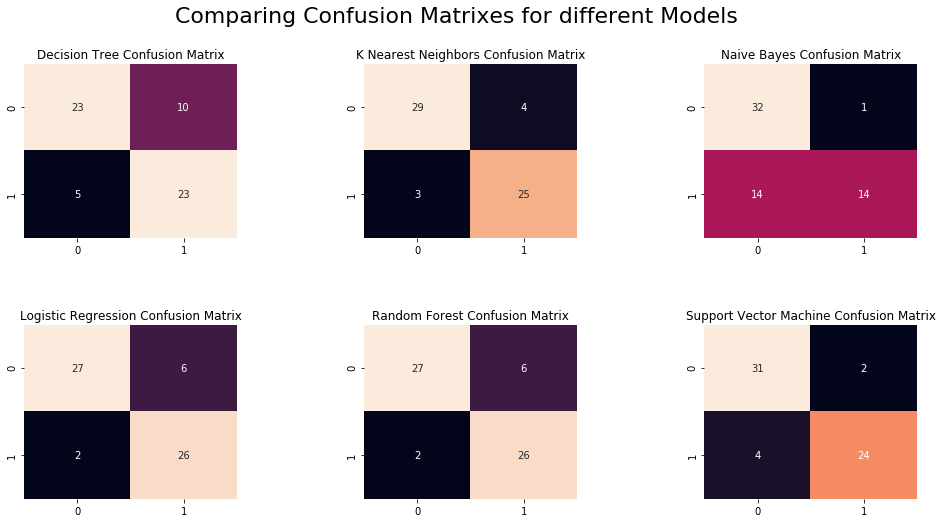

In [31]:
#For Specific Models

cm_plot = {}

for model_name, estimator in ensemble.named_estimators_.items():
    cm_plot[model_name] = confusion_matrix(y_test, estimator.predict(X_test))

plt.figure(figsize=(16,8))

plt.suptitle("Comparing Confusion Matrixes for different Models",fontsize=22)
plt.subplots_adjust(wspace = 0.6, hspace= 0.5)

plt.subplot(2,3,1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_plot['Decision tree'], annot=True, cbar = False)

plt.subplot(2,3,2)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_plot['KNN'], annot=True, cbar = False)

plt.subplot(2,3,3)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Naive Bayes Confusion Matrix")
cm_Naive_Bayes = sns.heatmap(cm_plot['Naive Bayes'], annot=True, cbar = False)

plt.subplot(2,3,4)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_plot['Logistic Regression'], annot=True, cbar = False)

plt.subplot(2,3,5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_plot['Random Forest'], annot=True, cbar = False)


plt.subplot(2,3,6)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_plot['SVM'], annot=True, cbar = False)

plt.show()